In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pcpow\Anaconda3\envs\Tensorflow\lib\site-packages

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.079693116 W= 0.27885813 b= 0.5909395
Epoch: 0100 cost= 0.079378746 W= 0.27711746 b= 0.603462
Epoch: 0150 cost= 0.079100825 W= 0.27548024 b= 0.6152395
Epoch: 0200 cost= 0.078855172 W= 0.27394086 b= 0.6263139
Epoch: 0250 cost= 0.078637995 W= 0.27249295 b= 0.63672996
Epoch: 0300 cost= 0.078445986 W= 0.27113107 b= 0.64652705
Epoch: 0350 cost= 0.078276210 W= 0.26985005 b= 0.6557428
Epoch: 0400 cost= 0.078126170 W= 0.26864544 b= 0.66440856
Epoch: 0450 cost= 0.077993557 W= 0.26751244 b= 0.6725596
Epoch: 0500 cost= 0.077876322 W= 0.2664467 b= 0.68022597
Epoch: 0550 cost= 0.077772729 W= 0.26544443 b= 0.6874365
Epoch: 0600 cost= 0.077681147 W= 0.2645017 b= 0.6942187
Epoch: 0650 cost= 0.077600226 W= 0.2636149 b= 0.70059776
Epoch: 0700 cost= 0.077528723 W= 0.26278096 b= 0.70659703
Epoch: 0750 cost= 0.077465527 W= 0.26199663 b= 0.71223974
Epoch: 0800 cost= 0.077409685 W= 0.261259 b= 0.71754646
Epoch: 0850 cost= 0.077360362 W= 0.26056516 b= 0.72253793
Epoch: 0900 cost= 0.07731679

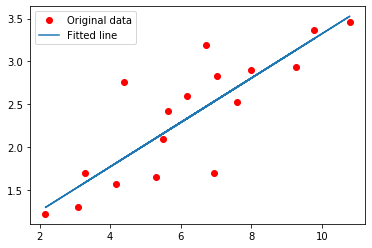

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            #print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            #    "W=", sess.run(W), "b=", sess.run(b)
            
            #WORKY        
            #print ("Epoch:", (epoch+1), "cost=", format(c), "W=", sess.run(W), "b=", sess.run(b))
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    #print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    #print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()